# 1 - Linear Regression - a curve fitting example

## 1.1 - Data generation

\begin{equation}
y = c_2x^2 + c_1x +c_0
\end{equation}


This is the "true" model for the curve.

In [1]:
import random

# get ground-truth data from the "true" model 
n = 20  # number of data samples
x = [(idx-round(n/2))/(n/2) for idx in range(n)]
print(x)

c = [1, 2, 3]
y = [xn**2*c[2] + xn*c[1] + c[0] for xn in x]
print(y)

# adding noise
StD = 0.2
y_observed = [y[idx]+random.gauss(0,StD) for idx in range(n)]

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[2.0, 1.6300000000000001, 1.3200000000000003, 1.0699999999999998, 0.8800000000000001, 0.75, 0.68, 0.67, 0.72, 0.83, 1.0, 1.23, 1.52, 1.87, 2.2800000000000002, 2.75, 3.2800000000000002, 3.8699999999999997, 4.5200000000000005, 5.23]


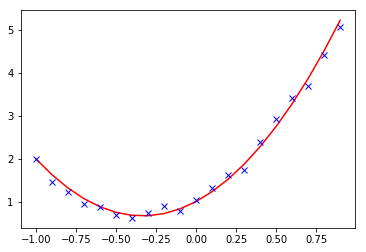

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the curve and the noise-corrupted data
plt.plot(x,y,'r')
plt.plot(x,y_observed,'bx')

## 1.2 - Model Fitting
Rearrange to get the linear system: 
\begin{equation*}
\textbf{Y} = \textbf{c}\textbf{X} \\
\textbf{Y} ^T = \textbf{X}^T\textbf{c}^T \\
\begin{vmatrix}
y_{(1)} \\ y_{(2)} \\ \cdots \\ y_{(n)}
\end{vmatrix} = \begin{vmatrix}
x^2_{(1)} & x_{(1)} & 1 \\
x^2_{(2)} & x_{(2)} & 1 \\
& \cdots \\
x^2_{(n)} & x_{(n)} & 1 
\end{vmatrix} \cdot
\begin{vmatrix}
c_2 & c_1 & c_0
\end{vmatrix}
\end{equation*}



[[ 1.   -1.    1.  ]
 [ 0.81 -0.9   1.  ]
 [ 0.64 -0.8   1.  ]
 [ 0.49 -0.7   1.  ]
 [ 0.36 -0.6   1.  ]
 [ 0.25 -0.5   1.  ]
 [ 0.16 -0.4   1.  ]
 [ 0.09 -0.3   1.  ]
 [ 0.04 -0.2   1.  ]
 [ 0.01 -0.1   1.  ]
 [ 0.    0.    1.  ]
 [ 0.01  0.1   1.  ]
 [ 0.04  0.2   1.  ]
 [ 0.09  0.3   1.  ]
 [ 0.16  0.4   1.  ]
 [ 0.25  0.5   1.  ]
 [ 0.36  0.6   1.  ]
 [ 0.49  0.7   1.  ]
 [ 0.64  0.8   1.  ]
 [ 0.81  0.9   1.  ]]
(20, 3)
(20, 1)
[[2.79946483]
 [2.00525716]
 [1.05413918]]


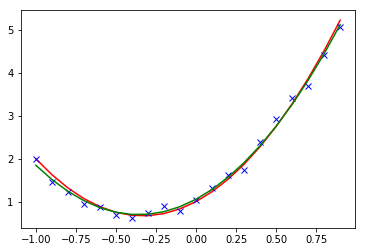

In [3]:
import numpy as np

# then use nunmpy for a least-square solution to the linear system "ax=b"
Y = np.transpose(np.array(y_observed, ndmin=2))
x_1 = np.transpose(np.array(x, ndmin=2))
x_2 = np.square(x_1)
x_0 = np.ones_like(x_1)
X = np.concatenate([x_2,x_1,x_0],1)
# print to check the inputs
print(X)
print(X.shape)
print(Y.shape)
c_estimate = np.linalg.lstsq(X, Y, rcond=None)
print(c_estimate[0])  # print the output

# plot to see the estimated curve, i.e.
# y_estimate = [xn**2*c_estimate[2] + xn*c_estimate[1] + c_estimate[0] for xn in x]
# but matrix multiplication may be more compact:
y_estimate = np.matmul(X,c_estimate[0])

plt.plot(x,y,'r')
plt.plot(x,y_observed,'bx')
plt.plot(x,y_estimate,'g')

## 1.3 - Over-fitting and under-fitting
### 1.3.1 - Model complexity
More complpex models usually lead to a more expressibility 
### 1.3.2 - Data availability
### 1.3.3 - Bias and variance